In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base() 
# reflect the tables
Base.prepare(autoload_with=engine)

In [14]:
# View all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [16]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

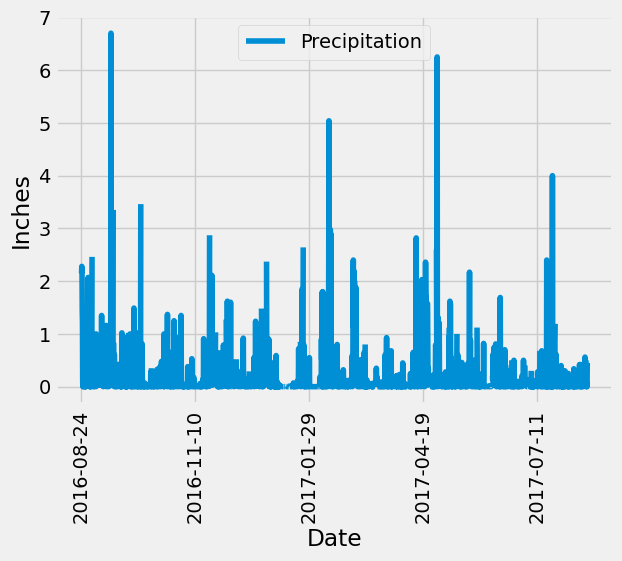

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
one_year_ago = latest_date - dt.timedelta(days=365)
#print(one_year_ago)

# Perform a query to retrieve the data and precipitation scores
precipitation= session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago)
#for rain in precipitation:
#    print(rain)

#Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns = ['Date','Precipitation'])

# Sort the dataframe by date
precipitation_df.dropna()
precipitation_df = precipitation_df.sort_values(by='Date')
#len(precipitation_df)

# Use Pandas Plotting with Matplotlib to plot the data
#precipitation_df['Date'], precipitation['Precipitation']
xvalues = precipitation_df['Date']
len(xvalues)
yvalues = precipitation_df['Precipitation']

precipitation_df.plot('Date', 'Precipitation', rot = 90)
#plt.xticks(np.arange(0,, step=5))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()
#plt.scatter(xvalues, yvalues)
#plt.show()

In [40]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number of stations in the dataset
num_station= session.query(measurement.station).group_by(measurement.station).count()
num_station

9

In [48]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(measurement.station, func.count(measurement.date) ).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_counts[0][0]
temperature_calculations = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active_station)
for tmp in temperature_calculations:
    print(tmp)

(54.0, 85.0, 71.66378066378067)


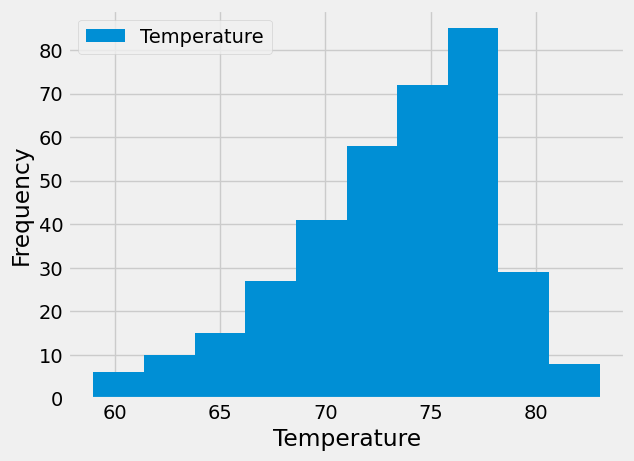

In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#temperature = session.query(measurement.tobs, func.count(measurement.tobs)).filter(measurement.date >= one_year_ago, measurement.station == most_active_station).group_by(measurement.tobs).all()
temperature = session.query(measurement.tobs).filter(measurement.date >= one_year_ago).filter(measurement.station == most_active_station).all()
#temperatures_list= []
#frequency_list = []
#for temp in temperature:
#    temperatures_list.append(temp[0])
#    frequency_list.append(temp[1])

#temperature_df = pd.DataFrame({ 'Temperature': temperatures_list, 'Frequency': frequency_list})
temperature_df = pd.DataFrame(temperature, columns = ['Temperature'])
temperature_df.plot.hist(bins = 10)
#plt.hist(temperature_df.Temperature, weights=temperature_df.Frequency)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
#plt.legend('tobs')
plt.show()

# Close Session

In [62]:
# Close Session
session.close()